1.0 Project Problem Definition :CREDIT CARD FRAUD DETECTION

2.0 Preparing the Data

2.1 Import the Dependency

In [1]:
# Importing the needed modules for this project
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2.2 Loading the Data

In [2]:
# load the dataset for this project
df = pd.read_csv("C:/Users/FASANXI SODIQ/codesoft project datasets/creditcard.csv ")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df['Class'].unique()

array([0, 1], dtype=int64)

2.3 Exploratory Analysis

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe().T
# decribe method shows that 25%, 50% and 75% of the data (= 0) is not a fraudulent transaction,
# this shows that the data is imbalance.

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


2.4 Cleaning the Data

In [8]:
# check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# check for duplicates
df.duplicated().sum()
# despite that, there are 1080 duplicates value in the data(transaction),
# i will not drop the duplicate values because of subject problem,
# that says i should classified the transaction as either fruad or real transaction

1081

In [10]:
fraud_transaction = df[df['Class'] == 1]
real_transaction = df[df['Class'] == 0]
print("Total Fraud Transaction :", len(fraud_transaction))
print("Total Genuine Transaction :", len(real_transaction))

Total Fraud Transaction : 492
Total Genuine Transaction : 284315


Text(0.5, 1.0, 'Correlation Matrix')

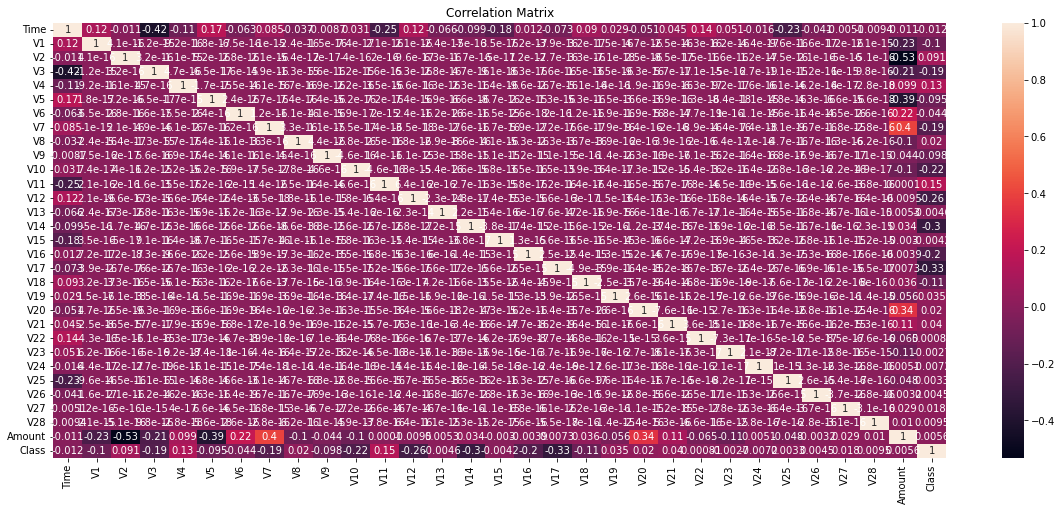

In [11]:
# plot the correlation matrix.
plt.rcParams["figure.figsize"] = (20,8)
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')

# it was shown from correlation matrix that all features are not correlated
# but some features are negatively and postively correlated.

2.5 Features Engineering/Features Transformation

In [12]:
# import model dependency.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [13]:
# Normalizing the training sets
from numpy import set_printoptions
from sklearn.preprocessing import QuantileTransformer
x = df.drop(['Class'], axis = 1).values
y = df['Class'].values
col = df.drop(['Class'], axis = 1).columns
qt =  QuantileTransformer(n_quantiles=100, output_distribution='normal')
qt_x = qt.fit_transform(x)
set_printoptions(precision=4)


qt_df = pd.DataFrame(qt_x, columns = col)
qt_df['Class'] = y
qt_df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-5.199338,-0.991574,-0.158040,2.101494,1.197219,-0.302074,0.718480,0.286808,0.195370,0.436676,...,0.040535,0.354277,-0.456244,0.074655,0.198546,-0.309626,0.841644,-0.321768,1.089288,0
1,-5.199338,0.460316,0.222165,-0.006499,0.419367,0.121529,0.213362,-0.160502,0.161265,-0.251826,...,-0.659251,-0.837961,0.492546,-0.647530,0.275400,0.380576,-0.091938,0.056040,-0.899990,0
2,-4.467706,-0.990666,-1.266601,1.378742,0.346835,-0.477625,1.369461,0.956907,0.532156,-1.452393,...,0.888737,1.038175,2.026010,-1.123092,-0.696486,-0.192684,-0.529865,-0.764182,1.675018,0
3,-4.467706,-0.707697,-0.284102,1.398580,-0.686848,0.047591,1.178587,0.284290,0.753784,-1.353388,...,-0.253899,0.000288,-0.788756,-1.663450,1.400206,-0.391083,0.522935,0.574346,0.967649,0
4,-4.317053,-0.853657,0.753913,1.154244,0.371477,-0.376048,0.401589,0.701492,-0.853528,0.865699,...,0.068602,1.082936,-0.573202,0.221515,-0.407476,1.022707,1.074340,1.448324,0.624009,0


In [74]:
# split the data into train_set and test_set
from sklearn.model_selection import train_test_split, cross_val_score, KFold
X = qt_df.drop(['Class'], axis = 1).values
Y = qt_df['Class'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=2023)
print("X_train :", x_train.shape)
print("X_test :", x_test.shape)
print("Y_train :", y_train.shape)
print("Y_test:", y_test.shape)


X_train : (199364, 30)
X_test : (85443, 30)
Y_train : (199364,)
Y_test: (85443,)



2.6 Models Building

Random Forest Model :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



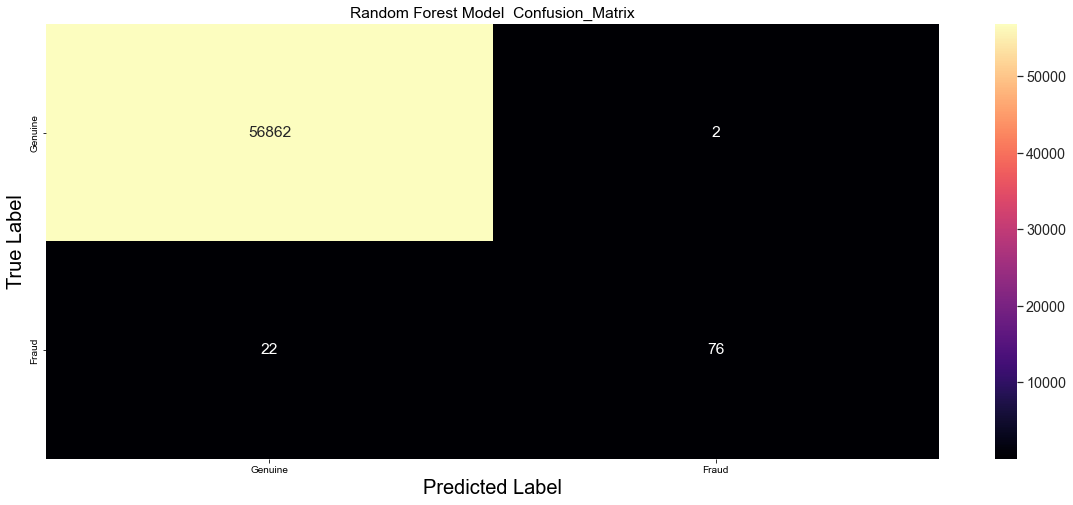

<Figure size 360x288 with 0 Axes>

In [15]:
# build random forest classifier model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train,y_train)
ypred_rf = rf_model.predict(x_test)
rf_accuracy = round(accuracy_score(y_test,ypred_rf)*100, 2)
rf_recall = round(recall_score(y_test,ypred_rf)*100, 2)
rf_precision  = round(precision_score(y_test,ypred_rf)*100, 2)
rf_f1_score = round(f1_score(y_test,ypred_rf)*100, 2)
rf_confusion_matrix = confusion_matrix(y_test, ypred_rf)
rf_cm_df = pd.DataFrame(rf_confusion_matrix)

print(classification_report(y_test, ypred_rf))
# plot the confusion_matrix
label = ['Genuine', 'Fraud']
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(5,4))
sns.heatmap(rf_cm_df, yticklabels = label, xticklabels = label, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Random Forest Model  Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()

LOGISTIC REGRESSION MODEL:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.74      0.81        98

    accuracy                           1.00     56962
   macro avg       0.94      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



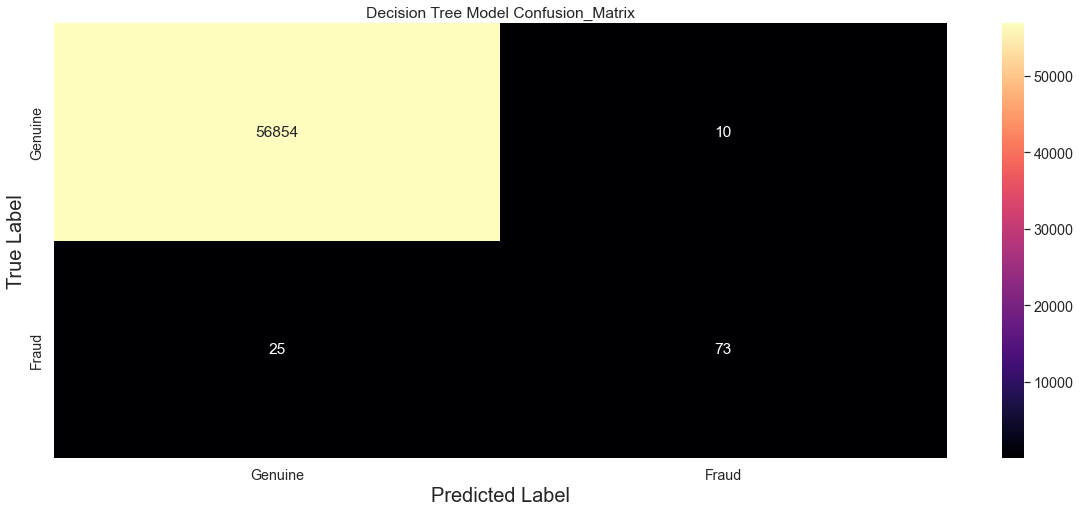

<Figure size 360x360 with 0 Axes>

In [16]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
ypred_lgr = lgr.predict(x_test)
print(classification_report(y_test, ypred_lgr))
lgr_accuracy = round(accuracy_score(y_test,ypred_lgr)*100, 2)
lgr_recall = round(recall_score(y_test,ypred_lgr)*100, 2)
lgr_precision  = round(precision_score(y_test,ypred_lgr)*100, 2)
lgr_f1_score = round(f1_score(y_test,ypred_lgr)*100, 2)
lgr_confusion_matrix = confusion_matrix(y_test, ypred_lgr)
lgr_cm_df = pd.DataFrame(lgr_confusion_matrix)
# plot the confusion_matrix
label = ['Genuine', 'Fraud']
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(5,5))
sns.heatmap(lgr_cm_df, yticklabels = label, xticklabels = label, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Decision Tree Model Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()

DECISION TREE CLASSIFIER MODEL:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.68      0.77        98

    accuracy                           1.00     56962
   macro avg       0.93      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962



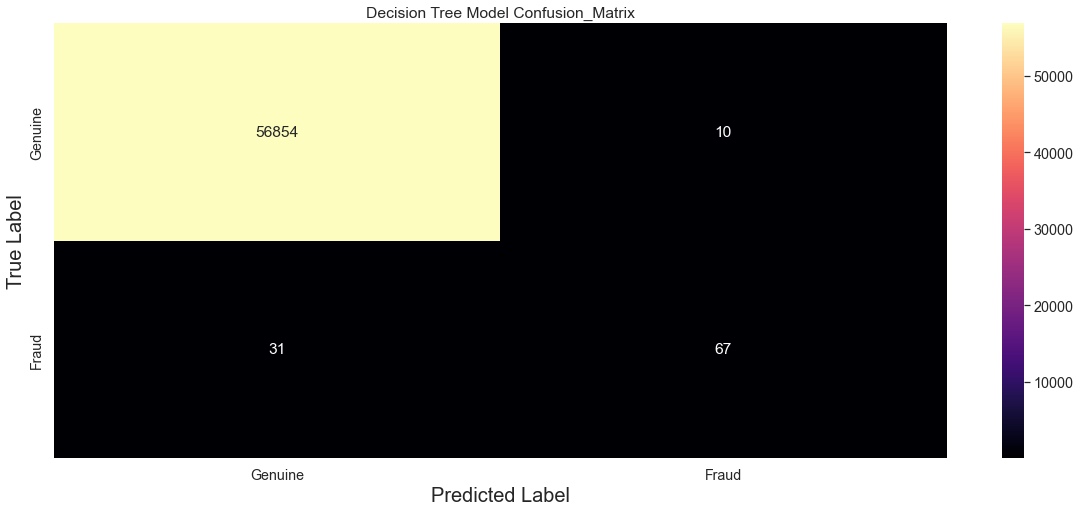

<Figure size 360x360 with 0 Axes>

In [17]:
# build the decision 
dt_model = DecisionTreeClassifier( max_depth = 3, random_state=42)
dt_model.fit(x_train, y_train)
ypred_dt = dt_model.predict(x_test)
print(classification_report(y_test, ypred_dt))
dtree_accuracy = round(accuracy_score(y_test,ypred_dt)*100, 2)
dtree_recall = round(recall_score(y_test,ypred_dt)*100, 2)
dtree_precision  = round(precision_score(y_test,ypred_dt)*100, 2)
dtree_f1_score = round(f1_score(y_test,ypred_dt)*100, 2)
dt_confusion_matrix = confusion_matrix(y_test, ypred_dt)
dt_cm_df = pd.DataFrame(dt_confusion_matrix)
# plot the confusion_matrix
label = ['Genuine', 'Fraud']
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(5,5))
sns.heatmap(dt_cm_df, yticklabels = label, xticklabels = label, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Decision Tree Model Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()

Support Vector Machine Model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.79      0.85        98

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



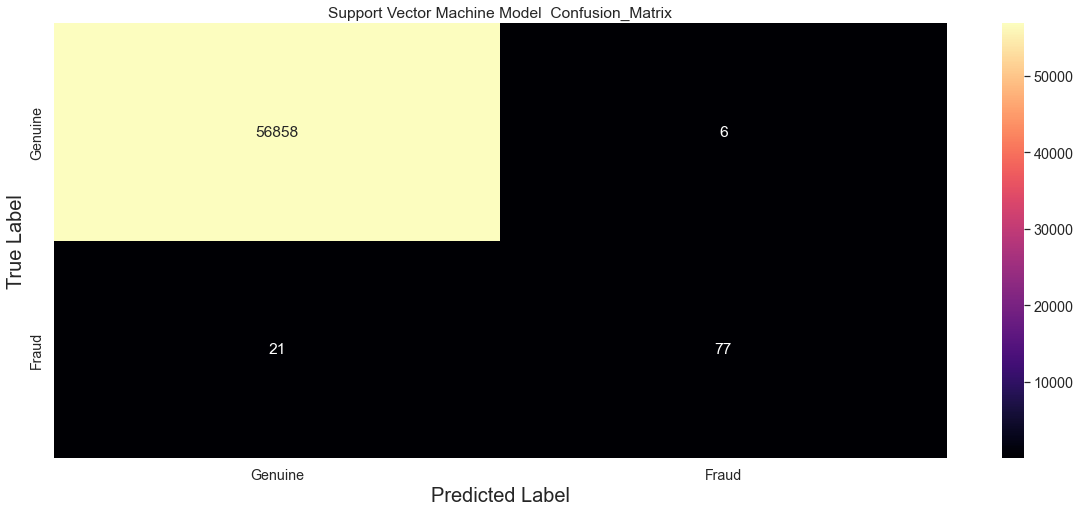

<Figure size 360x360 with 0 Axes>

In [18]:
# buil svm model.
SVM_model = SVC()
SVM_model.fit(x_train,y_train)
ypred_svm = SVM_model.predict(x_test)
print(classification_report(y_test, ypred_svm))
svm_accuracy = round(accuracy_score(y_test,ypred_svm)*100, 2)
svm_recall = round(recall_score(y_test,ypred_svm)*100, 2)
svm_precision  = round(precision_score(y_test,ypred_svm)*100, 2)
svm_f1_score = round(f1_score(y_test,ypred_svm)*100, 2)
svm_confusion_matrix = confusion_matrix(y_test, ypred_svm)
svm_cm_df = pd.DataFrame(svm_confusion_matrix)

# plot the confusion_matrix
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(5,5))
sns.heatmap(svm_cm_df, yticklabels = label, xticklabels = label, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Support Vector Machine Model  Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()

KNN Model :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



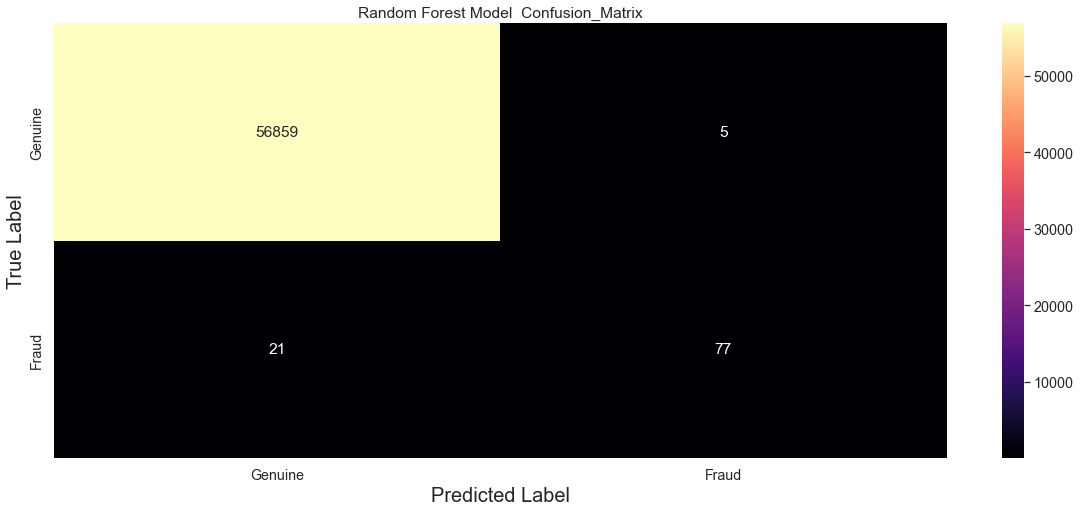

<Figure size 360x360 with 0 Axes>

In [19]:
# build k-nearest neigbor algorithm/model. 
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
ypred_knn = knn_model.predict(x_test)
print(classification_report(y_test, ypred_knn))
knn_accuracy = round(accuracy_score(y_test, ypred_knn)*100, 2)
knn_precision = round(precision_score(y_test, ypred_knn)*100, 2)
knn_recall = round(recall_score(y_test, ypred_knn)*100, 2)
knn_f1_score = round(f1_score(y_test, ypred_knn)*100, 2)
knn_confusion_matrix = confusion_matrix(y_test, ypred_knn)
knn_cm_df = pd.DataFrame(knn_confusion_matrix)


# plot the confusion_matrix
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(5,5))
sns.heatmap(knn_cm_df, yticklabels = label, xticklabels = label, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Random Forest Model  Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()  
   

2.7 Models Evaluation

In [20]:
columnName = ['Accuracy Score', 'Precission Score', 'Recall Score', 'F1 Score']
idx = ['knn', 'dtree', 'rf', 'lgr', 'svm']
svm_metrics = [svm_accuracy, svm_precision, svm_recall, svm_f1_score]
dtree_metrics = [dtree_accuracy, dtree_precision, dtree_recall, dtree_f1_score]
rf_metrics = [rf_accuracy, rf_precision, rf_recall, rf_f1_score]
knn_metrics = [knn_accuracy, knn_precision, knn_recall, knn_f1_score]
lgr_metrics = [lgr_accuracy, lgr_precision, lgr_recall, lgr_f1_score]
models_metric = [knn_metrics,dtree_metrics,rf_metrics, lgr_metrics, svm_metrics]
metrics = pd.DataFrame(models_metric, columns = columnName, index = idx)
metrics.sort_values(by=['F1 Score'], ascending=False)

,Accuracy Score,Precission Score,Recall Score,F1 Score
rf,99.96,97.44,77.55,86.36
knn,99.95,93.90,78.57,85.56
svm,99.95,92.77,78.57,85.08
lgr,99.94,87.95,74.49,80.66
dtree,99.93,87.01,68.37,76.57


2.8 Preprocess the data.

In [65]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, QuantileTransformer 
ss = StandardScaler()
X_train = ss.fit_transform(X)

In [66]:
# deal with imbalance training set using stratify kfold.
# split into train/test sets with same class ratio
xtrain, xtest, ytrain, ytest = train_test_split(X_train, y, test_size=0.3, random_state=42, stratify=y)
# summarize
train_0, train_1 = len(ytrain[ytrain==0]), len(ytrain[ytrain==1])
test_0, test_1 = len(ytest[ytest==0]), len(ytest[ytest==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=199020, 1=344, Test: 0=85295, 1=148


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.73      0.82       148

    accuracy                           1.00     85443
   macro avg       0.96      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



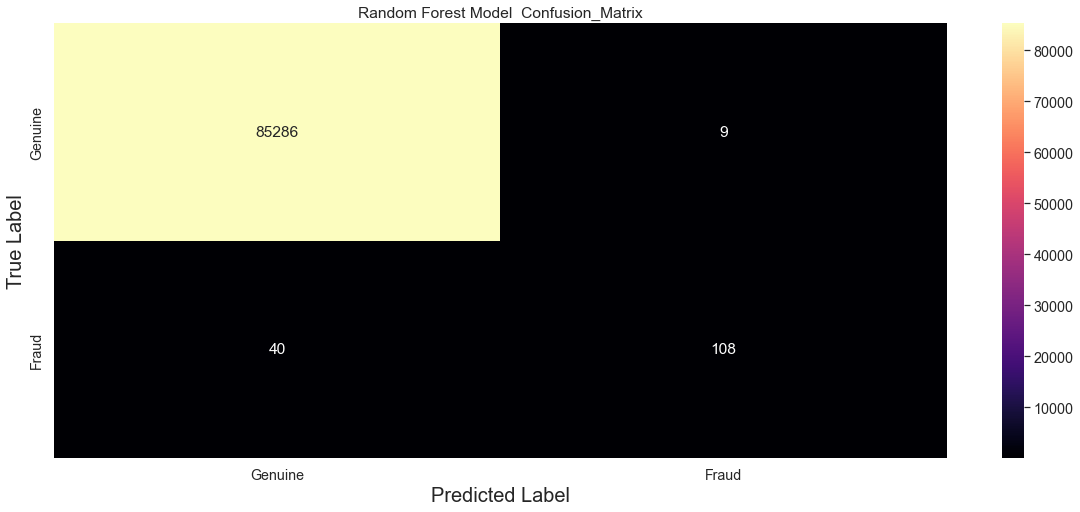

<Figure size 360x360 with 0 Axes>

In [73]:
# build k-nearest neigbor algorithm/model. 
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(xtrain,ytrain)
ypred_knn = knn_model.predict(xtest)
print(classification_report(ytest, ypred_knn))
knn_confusion_matrix = confusion_matrix(ytest, ypred_knn)
knn_cm_df = pd.DataFrame(knn_confusion_matrix)
# plot the confusion_matrix
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(5,5))
sns.heatmap(knn_cm_df, yticklabels = label, xticklabels = label, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Random Forest Model  Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()  
   

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.74      0.81       148

    accuracy                           1.00     85443
   macro avg       0.95      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



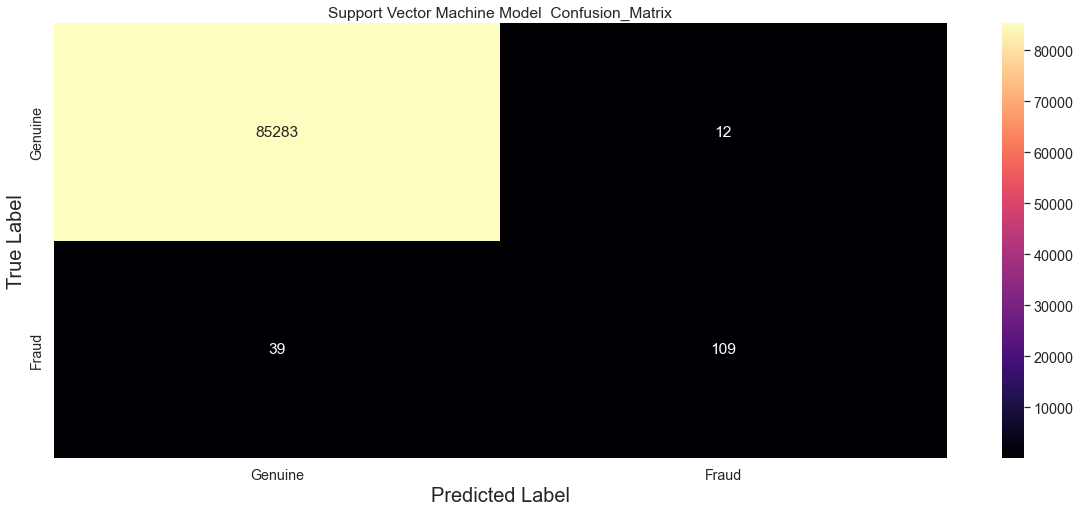

<Figure size 360x360 with 0 Axes>

In [24]:
# buil svm model.
SVM_model = SVC()
SVM_model.fit(xtrain,ytrain)
ypred_svm = SVM_model.predict(xtest)
print(classification_report(ytest, ypred_svm))
svm_confusion_matrix = confusion_matrix(ytest, ypred_svm)
svm_cm_df = pd.DataFrame(svm_confusion_matrix)
# plot the confusion_matrix
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(5,5))
sns.heatmap(svm_cm_df, yticklabels = label, xticklabels = label, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Support Vector Machine Model  Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.73      0.76       148

    accuracy                           1.00     85443
   macro avg       0.89      0.86      0.88     85443
weighted avg       1.00      1.00      1.00     85443



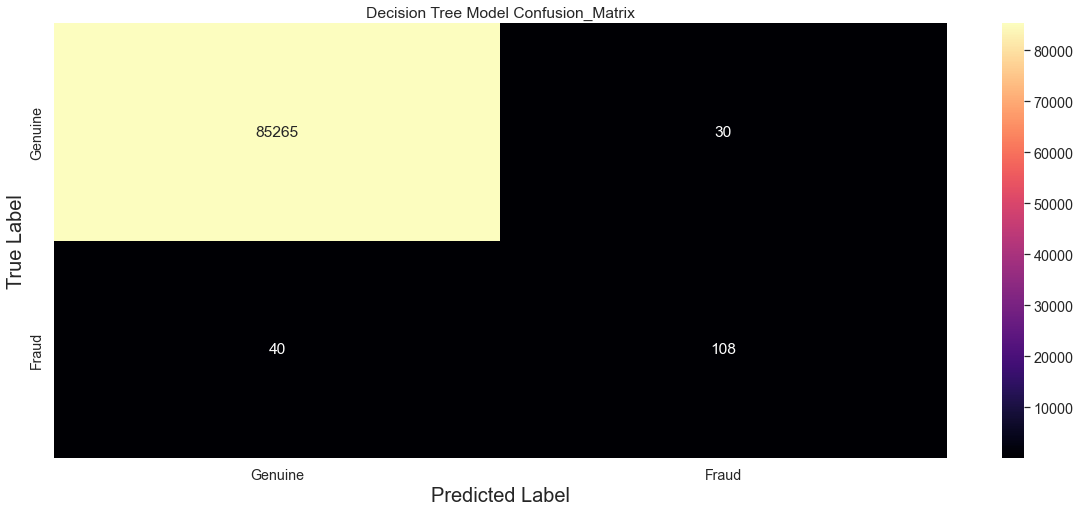

<Figure size 360x360 with 0 Axes>

In [75]:
# build the decision 
dt_model = DecisionTreeClassifier( max_depth = 3, random_state=42)
dt_model.fit(xtrain, ytrain)
ypred_dt = dt_model.predict(xtest)
print(classification_report(ytest, ypred_dt))
dt_confusion_matrix = confusion_matrix(ytest, ypred_dt)
dt_cm_df = pd.DataFrame(dt_confusion_matrix)
# plot the confusion_matrix
label = ['Genuine', 'Fraud']
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(5,5))
sns.heatmap(dt_cm_df, yticklabels = label, xticklabels = label, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Decision Tree Model Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.74      0.79       148

    accuracy                           1.00     85443
   macro avg       0.92      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



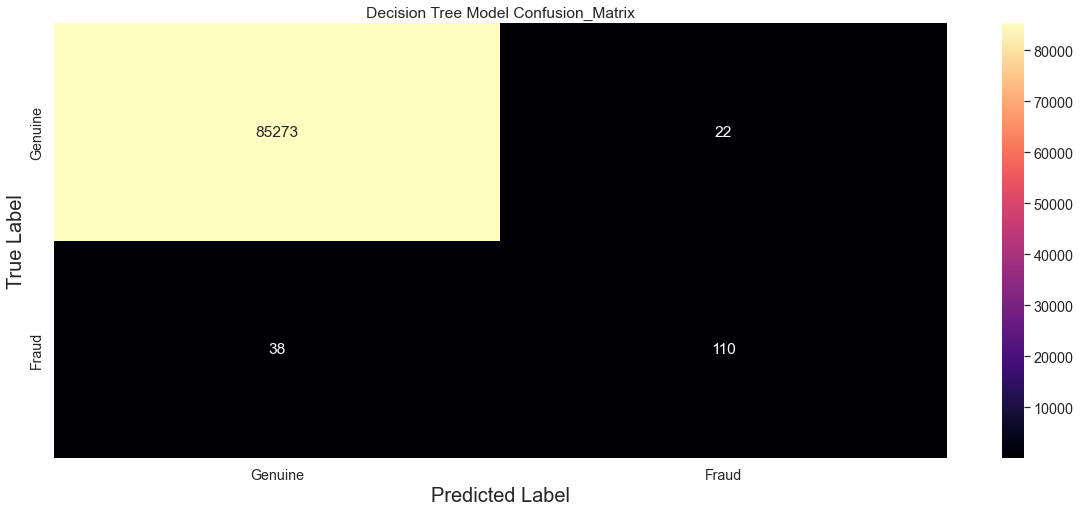

<Figure size 360x360 with 0 Axes>

In [76]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(xtrain,ytrain)
ypred_lgr = lgr.predict(xtest)
print(classification_report(ytest, ypred_lgr))
lgr_confusion_matrix = confusion_matrix(ytest, ypred_lgr)
lgr_cm_df = pd.DataFrame(lgr_confusion_matrix)
# plot the confusion_matrix
label = ['Genuine', 'Fraud']
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(5,5))
sns.heatmap(lgr_cm_df, yticklabels = label, xticklabels = label, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Decision Tree Model Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.75      0.84       148

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



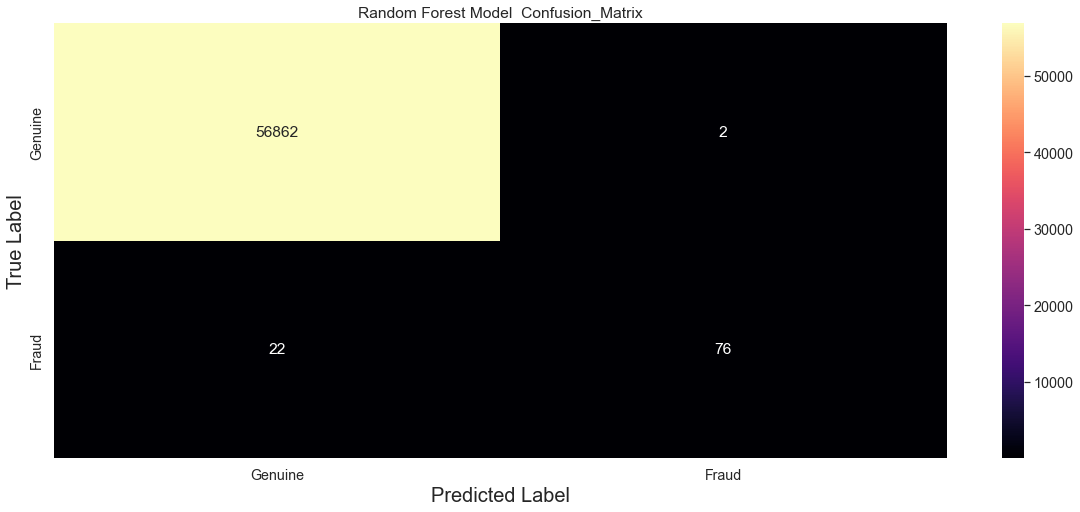

<Figure size 360x288 with 0 Axes>

In [77]:
# build random forest classifier model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(xtrain,ytrain)
ypred_rf = rf_model.predict(xtest)
print(classification_report(ytest, ypred_rf))
# plot the confusion_matrix
label = ['Genuine', 'Fraud']
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(5,4))
sns.heatmap(rf_cm_df, yticklabels = label, xticklabels = label, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Random Forest Model  Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()

USING ADVANCE ALGORITHM:

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.78      0.85       148

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



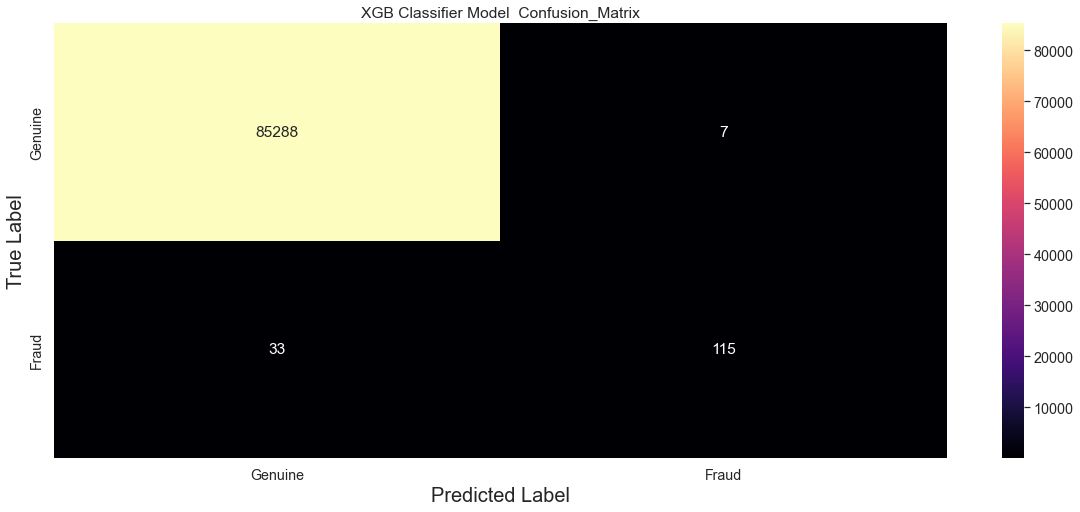

<Figure size 360x288 with 0 Axes>

In [68]:
xgb_cl =  XGBClassifier()
xgb_cl.fit(xtrain, ytrain, eval_metric='aucpr')
ypred_xgb = xgb_cl.predict(xtest)
print(classification_report(ytest, ypred_xgb))
xgb_confusion_matrix = confusion_matrix(ytest, ypred_xgb)
xgb_cm_df = pd.DataFrame(xgb_confusion_matrix)
# plot the confusion_matrix
label = ['Genuine', 'Fraud']
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(5,4))
sns.heatmap(xgb_cm_df, yticklabels = label, xticklabels = label, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('XGB Classifier Model  Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.24      0.38       148

    accuracy                           1.00     85443
   macro avg       0.91      0.62      0.69     85443
weighted avg       1.00      1.00      1.00     85443



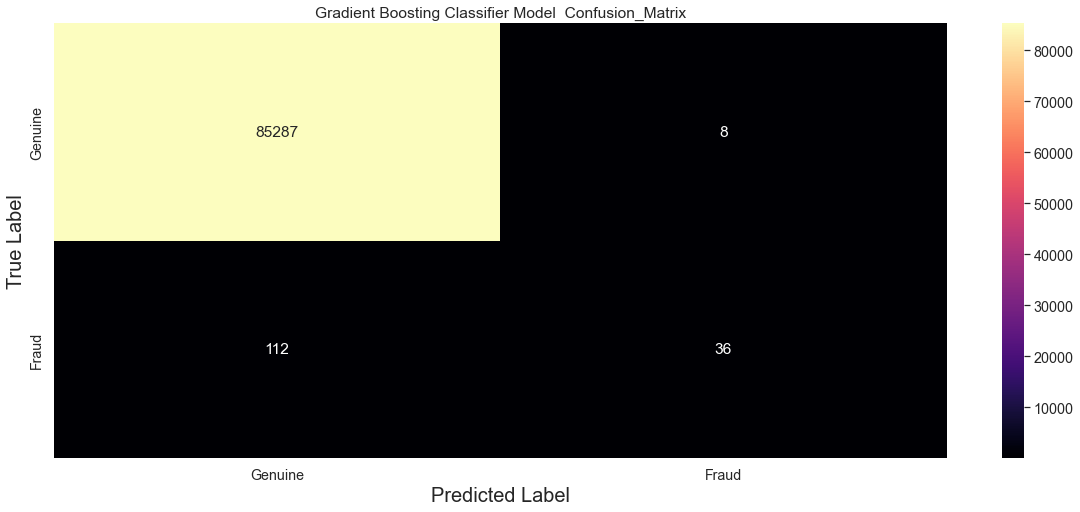

<Figure size 360x288 with 0 Axes>

In [69]:
gb_cl =  GradientBoostingClassifier(n_estimators=10, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)
gb_cl.fit(xtrain, ytrain)
ypred_gb = gb_cl.predict(xtest)
print(classification_report(ytest, ypred_gb))
gb_confusion_matrix = confusion_matrix(ytest, ypred_gb)
gb_cm_df = pd.DataFrame(gb_confusion_matrix)
# plot the confusion_matrix
label = ['Genuine', 'Fraud']
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(5,4))
sns.heatmap(gb_cm_df, yticklabels = label, xticklabels = label, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Gradient Boosting Classifier Model  Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()